In [ ]:
# !pip install --force-reinstall --no-deps git+https://github.com/nltk/nltk@develop
# import nltk
# nltk.download("all", quiet=True)

In [ ]:
# # upgrade spacy to the latest version
# !pip install -U pip setuptools wheel
# !pip install -U spacy
# !python -m spacy download en_core_web_sm

In [ ]:
# !pip install gensim


In [ ]:
import re
import nltk
from nltk.corpus import gutenberg

# Download the Gutenberg corpus if not already downloaded
nltk.download("gutenberg")

def load_texts(book_list):
    return [nltk.corpus.gutenberg.raw(book) for book in book_list]

def load_text_from_file(filename):
    """Loads text from a file."""
    with open(filename, 'r') as file:
        text = file.read()
    return text

def remove_preface_and_extract_chapter(text):
    # Define patterns to identify the start of the first chapter or volume
    chapter_start_patterns = [
        r'\bChapter\s+1\b',  # Common pattern for Chapter 1
        r'\bChapter\s+I\b',  # Roman numeral pattern for Chapter I
        r'\bCHAPTER\s+ONE\b',  # Uppercase pattern for CHAPTER ONE
        r'\bI\.\s+',  # Pattern for I. (some books might use this format)
        r'\b1\.\s+',  # Pattern for 1. (numeric format)
        r'\bVolume\s+1\b',  # Common pattern for Volume 1
        r'\bVolume\s+I\b',  # Roman numeral pattern for Volume I
    ]

    # Combine all patterns into one
    combined_pattern = '|'.join(chapter_start_patterns)

    # Search for the first occurrence of the chapter or volume start pattern
    match = re.search(combined_pattern, text, re.IGNORECASE)

    if match:
        # If a match is found, extract the text from the start of the first chapter or volume onwards
        chapter_start_index = match.start()
        return text[chapter_start_index:]
    else:
        # If no match is found, return the original text (or handle it as needed)
        print("No chapter or volume start pattern found.")
        return text

def preprocess_texts(texts):
    return [remove_preface_and_extract_chapter(text) for text in texts]

# Training books (Charles Dickens)
dickens_books_train = [
    "chesterton-brown.txt",  # David Copperfield
    "chesterton-thursday.txt",  # Great Expectations
]

# Training books (Jane Austen)
austen_books_train = [
    "austen-emma.txt",    # Emma
    #"austen-sense.txt",    # Sense and Sensibility
]

# Load Shakespeare text from file
shakespeare_book_train = load_text_from_file("shakespeare.txt")

# Training books (King James Bible)
kj_books_train = ['bible-kjv.txt']


# Test books
dickens_books_test = ["chesterton-ball.txt"]  # A Tale of Two Cities
austen_books_test = ["austen-persuasion.txt"]    # Persuasion
shakespeare_books_test = [
    "shakespeare-macbeth.txt",  # Macbeth
    "shakespeare-hamlet.txt",   # Hamlet
    "shakespeare-caesar.txt",   # Julius Caesar
                           ]

# Load the training sets
dickens_texts_train = load_texts(dickens_books_train)
austen_texts_train = load_texts(austen_books_train)
# Extract 1/5th portion from the middle of Shakespeare text
text_length = len(shakespeare_book_train)
start_index = text_length // 2 - (text_length // 10)  # Start from a quarter of the way in
end_index = start_index + text_length // 6
shakespeare_texts_train = [shakespeare_book_train[start_index:end_index]]  # Extract

#Loadig Test sets
dickens_texts_test = load_texts(dickens_books_test)
austen_texts_test = load_texts(austen_books_test)
# Extract the next 1/10th portion for testing
start_index_test = end_index
end_index_test = start_index_test + text_length // 11
shakespeare_texts_test = [shakespeare_book_train[start_index_test:end_index_test]]

# Preprocess the texts to remove prefaces and keep only the part from the first chapter or volume onwards
dickens_texts_train = preprocess_texts(dickens_texts_train)
austen_texts_train = preprocess_texts(austen_texts_train)
shakespeare_texts_train = preprocess_texts(shakespeare_texts_train)

dickens_texts_test = preprocess_texts(dickens_texts_test)
austen_texts_test = preprocess_texts(austen_texts_test)
shakespeare_texts_test = preprocess_texts(shakespeare_texts_test)

# Print the first 100 characters of each cleaned training text to verify
for i, text in enumerate(dickens_texts_train):
    print(f"Dickens Training Book {i+1}: {text[:100]}...\n")

for i, text in enumerate(austen_texts_train):
    print(f"Austen Training Book {i+1}: {text[:100]}...\n")

for i, text in enumerate(shakespeare_texts_train):
    print(f"Shakespeare Training Book {i+1}: {text[:100]}...\n")

# Print the first 100 characters of each cleaned test text to verify
for i, text in enumerate(dickens_texts_test):
    print(f"Dickens Test Book {i+1}: {text[:100]}...\n")

for i, text in enumerate(austen_texts_test):
    print(f"Austen Test Book {i+1}: {text[:100]}...\n")

for i, text in enumerate(shakespeare_texts_test):
    print(f"Shakespeare Test Book {i+1}: {text[:100]}...\n")

Dickens Training Book 1: I. The Absence of Mr Glass


THE consulting-rooms of Dr Orion Hood, the eminent criminologist
and sp...

Dickens Training Book 2: CHAPTER I

THE TWO POETS OF SAFFRON PARK

THE suburb of Saffron Park lay on the sunset side of Londo...

Austen Training Book 1: VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy ...

Shakespeare Training Book 1: I. France. The French King’s tent.

Enter Constance, Arthur and Salisbury.

CONSTANCE.
Gone to be ma...

Dickens Test Book 1: I. A DISCUSSION SOMEWHAT IN THE AIR

The flying ship of Professor Lucifer sang through the skies lik...

Austen Test Book 1: Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,
for his own amusem...

Shakespeare Test Book 1: I. A field near Frogmore


Enter Sir Hugh Evans and Simple.

EVANS.
I pray you now, good Master Slen...



[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [ ]:
# Function to calculate word count
def calculate_word_count(text):
    words = text.split()  # Split text into words based on whitespace
    return len(words)  # Return the length of the list of words

# Calculate and print word count for Dickens training books
for i, text in enumerate(dickens_texts_train):
    word_count = calculate_word_count(text)
    print(f"Dickens Training Book {i+1} word count: {word_count}")

# Calculate and print word count for Austen training books
for i, text in enumerate(austen_texts_train):
    word_count = calculate_word_count(text)
    print(f"Austen Training Book {i+1} word count: {word_count}")

# Calculate and print word count for Shakespeare training books
for i, text in enumerate(shakespeare_texts_train):
    word_count = calculate_word_count(text)
    print(f"Shakespeare Training Book {i+1} word count: {word_count}")

# Calculate and print word count for Dickens test books
for i, text in enumerate(dickens_texts_test):
    word_count = calculate_word_count(text)
    print(f"Dickens Test Book {i+1} word count: {word_count}")

# Calculate and print word count for Austen test books
for i, text in enumerate(austen_texts_test):
    word_count = calculate_word_count(text)
    print(f"Austen Test Book {i+1} word count: {word_count}")

# Calculate and print word count for Shakespeare test books
for i, text in enumerate(shakespeare_texts_test):
    word_count = calculate_word_count(text)
    print(f"Shakespeare Test Book {i+1} word count: {word_count}")


Dickens Training Book 1 word count: 71616
Dickens Training Book 2 word count: 57427
Austen Training Book 1 word count: 158162
Shakespeare Training Book 1 word count: 158078
Dickens Test Book 1 word count: 81589
Austen Test Book 1 word count: 83303
Shakespeare Test Book 1 word count: 87017


In [ ]:
# prompt: write a function to extract loaded data into text files

def extract_to_files(texts, prefix):
  """
  Extracts a list of texts into individual text files.

  Args:
    texts: A list of strings, where each string represents a text.
    prefix: A string to be used as a prefix for the filenames.
  """

  for i, text in enumerate(texts):
    filename = f"{prefix}_{i+1}.txt"
    with open(filename, 'w') as file:
      file.write(text)
    print(f"Saved text to {filename}")

# Example usage:
extract_to_files(dickens_texts_train, "dickens_train")
extract_to_files(austen_texts_train, "austen_train")
extract_to_files(shakespeare_texts_train, "shakespeare_train")

extract_to_files(dickens_texts_test, "dickens_test")
extract_to_files(austen_texts_test, "austen_test")
extract_to_files(shakespeare_texts_test, "shakespeare_test")


Saved text to dickens_train_1.txt
Saved text to dickens_train_2.txt
Saved text to austen_train_1.txt
Saved text to shakespeare_train_1.txt
Saved text to dickens_test_1.txt
Saved text to austen_test_1.txt
Saved text to shakespeare_test_1.txt


Performing NER - due to different writing style of shakespeare this code unlike for dickens and austen, does not works very well with shakespeare


In [ ]:
import spacy

def extract_entities(text):
    # Load spaCy model for NER
    nlp = spacy.load("en_core_web_sm")

    # Process the text with spaCy NER
    doc = nlp(text)

    # Define the set of allowed entity labels
    allowed_labels = {"PERSON", "LOC"}

    # Extract entities and filter them based on allowed labels and PROPN type
    entities = {ent.text.lower() for ent in doc.ents if ent.label_ in allowed_labels and  any(token.pos_ == "PROPN" for token in ent)}

    return list(entities)



In [ ]:
#extracting entities for austen
au_ent_test = extract_entities(austen_texts_test[0])
au_ent_train = extract_entities(austen_texts_train[0])
#Extracting entities for dickens
dickens_ent_test = extract_entities(dickens_texts_test[0])
dickens_ent_train = extract_entities(dickens_texts_train[0])

In [ ]:
sh_ent_test = extract_entities(shakespeare_texts_test[0])
shakespeare_ent_train = extract_entities(shakespeare_texts_train[0])

In [ ]:
print('Austen Test Entites count: ',len(au_ent_test))
print('Austen Train Entites count: ',len(au_ent_train))
print('Dickens Test Entites count: ',len(dickens_ent_test))
print('Dickens Train Entites count: ',len(dickens_ent_train))
print('Shakespeare Test set entity count:',len(sh_ent_test))
print('Shakespeare Train set entity count:',len(shakespeare_ent_train))

Austen Test Entites count:  197
Austen Train Entites count:  294
Dickens Test Entites count:  210
Dickens Train Entites count:  252
Shakespeare Test set entity count: 445
Shakespeare Train set entity count: 829


In [ ]:
print('Austen Entities')
print(au_ent_test)
print(au_ent_train)
print('Dickens Entities')
print(dickens_ent_test)
print(dickens_ent_train)
print('Shakespeare Entities')
print(sh_ent_test)
print(shakespeare_ent_train)

Austen Entities
['john shepherd', 'cape', 'hayter', 'basil', 'james stevenson', 'atkinson', 'shirley', 'anne', 'sidmouth', 'crofts', 'trent', 'walter', 'leave little charles', 'captain brigden', 'harry', '&c.', 'sophy', 'a mrs smith', 'walter\nelliot', 'mrs wallis', 'frederick wentworth', 'lady wentworth', 'charles said--', 'captain wentworth--', 'kindest', 'michaelmas', 'sophia', 'shabby', 'mr smith', 'clifton', 'mrs smith', 'anne\n', 'louisa', "mrs clay's", 'scott', 'laura place', 'miss anne', 'taunton', 'mary to anne', 'mary for anne\n', 'mary, anne', 'charles, anne', 'elizabeth', 'louise', "mrs musgrove's", 'walter elliot', 'charles ii', 'mrs charles', 'anne eagerly suggested--', 'lady dalrymple', "mrs wallis's", 'crewkherne', 'charles\nmusgrove', 'anne haggard', 'mrs musgrove', 'charles musgrove', 'pleased;--\ncharles hayter', 'anne eagerly', 'cousin charles', 'carteret', 'mrs', "mrs charles's", 'st domingo', 'queen squares', 'lady mary grierson', 'anne felt', 'uppercross', "lady 

In [ ]:
# import spacy

# def extract_entities_sh(text):
#     # Load spaCy model for NER
#     nlp = spacy.load("en_core_web_sm")

#     # Process the text with spaCy NER
#     doc = nlp(text)

#     # Define the set of allowed entity labels
#     allowed_labels =  {"PERSON", "LOC"}
#     # Extract entities and filter them based on allowed labels and PROPN type
#     entities = {ent.text.lower() for ent in doc.ents if ent.label_ in allowed_labels and any(token.pos_ == "PROPN" for token in ent)}

#     return list(entities)



In [ ]:
def combine_lists(list1, list2, list3):
    combined_list = list1 + list2 + list3
    unique_elements = list(set(combined_list))  # Convert to set to remove duplicates, then back to list
    return unique_elements

In [ ]:
train_ent = combine_lists(au_ent_train, dickens_ent_train, shakespeare_ent_train)
test_ent = combine_lists(au_ent_test, dickens_ent_test, sh_ent_test)

In [ ]:
print(len(train_ent))
print(len(test_ent))

1343
832


In [ ]:
#Filtering the training and testing entities further
import spacy

def filter_proper_nouns(entities):
    # Load spaCy model for English
    nlp = spacy.load("en_core_web_sm")

    # Initialize a set to store filtered entities
    filtered_entities = set()

    # Process each entity using spaCy
    for entity in entities:
        doc = nlp(entity)
        is_proper_noun = False
        for token in doc:
            if token.pos_ == "PROPN" and (token.ent_type_ == "PERSON" or token.ent_type_ == "GPE"):
                is_proper_noun = True
                break
        if is_proper_noun:
            filtered_entities.add(entity.lower())  # Add lowercased entity to set

    return list(filtered_entities)


In [ ]:
train_ent = filter_proper_nouns(train_ent)
test_ent = filter_proper_nouns(test_ent)

In [ ]:
print(len(train_ent))
print(len(test_ent))

319
199


In [ ]:
print(train_ent)
print(test_ent)

['emma woodhouse', 'ben venuto', 'miss woodhouse--', 'peter of pomfret', 'harry', 'young arthur', 'thou saucy', 'davis', 'kidd', 'anne cox', 'patrick butler', 'donwell lane', 'henry james', 'diana', 'ho', 'john knightley', 'loo loo!', 'oscar rian', 'box hill--', 'nelson', 'scene i. a heath\nscene ii', 'haud\ncredo', 'carr', 'don adriano de\n', 'thou marshall’st', 'john knightley.--this', 'churchill--', 'thou know’st', 'birmingham', 'thou conclud’st', 'frank harrogate', 'quoniam', 'paul', 'gelida quando pecus', 'enter brutus', 'friar peter', 'well--', 'philip hawker', 'philippi', 'max beerbohm', 'miss hawkins,--i', 'act v\nscene i. belmont', 'frank churchill', 'jessica', 'monsieur marcadé', 'mickleham', 'i. signior costard', 'george otway', 'thou shalt marry', 'st michael', 'selina', 'out.--he', 'thou keep’st', 'robert\nmartin', "calhoun kidd's", 'miss taylor', 'abraham', 'joshua', 'consciousness.--miss taylor', 'thou goest', 'longaville, dumaine, berowne and attendants', 'hugh evans', 

Dividing text into sequence of 100

In [ ]:
import pandas as pd

def divide_text_into_sequences(texts, label, sequence_length=100):
    """
    Divide a list of texts into sequences of a specified length and include a label.

    Parameters:
    texts (list): List of texts to divide.
    label (str): Label to assign to each sequence.
    sequence_length (int): Length of each sequence. Default is 100.

    Returns:
    DataFrame: DataFrame containing sequences and their corresponding label.
    """
    all_sequences = []
    for text in texts:
        words = text.split()

        sequences = []
        current_sequence = []

        for i, word in enumerate(words):
            current_sequence.append(word)
            if len(current_sequence) == sequence_length or i == len(words) - 1:
                sequences.append(" ".join(current_sequence))
                current_sequence = []
        all_sequences.extend(sequences)

    # Create a DataFrame to display the sequences
    df = pd.DataFrame({"Sequence": all_sequences})

    # Add the label column
    df['Label'] = label

    return df



In [ ]:
# 0 --> Dickens; 1--> Jane Austen; 2-->Shakespeare
dickens_df_train = divide_text_into_sequences(dickens_texts_train,0, sequence_length=25)
au_df_train = divide_text_into_sequences(austen_texts_train, 1,sequence_length=25)
sh_df_train = divide_text_into_sequences(shakespeare_texts_train, 2,sequence_length=25)

dickens_df_test = divide_text_into_sequences(dickens_texts_test, 0,sequence_length=25)
au_df_test = divide_text_into_sequences(austen_texts_test, 1, sequence_length=25)
sh_df_test = divide_text_into_sequences(shakespeare_texts_test, 2, sequence_length=25)


combine the training and testing df here

In [ ]:
print(dickens_df_test)
print(au_df_test)
print(sh_df_test)

                                               Sequence  Label
0     I. A DISCUSSION SOMEWHAT IN THE AIR The flying...      0
1     of it, gleaming in the bleak blue emptiness of...      0
2     two men in it, it seemed to be far above the s...      0
3     everything in it. Every sort of tool or appara...      0
4     of science. For the world of science and evolu...      0
...                                                 ...    ...
3259  readable form. The Project gratefully accepts ...      0
3260  Gutenberg Literary Archive Foundation." If you...      0
3261  this eBook's header and trailer may be reprint...      0
3262  is a TradeMark and may not be used in any sale...      0
3263  other related product without express permissi...      0

[3264 rows x 2 columns]
                                               Sequence  Label
0     Chapter 1 Sir Walter Elliot, of Kellynch Hall,...      1
1     Baronetage; there he found occupation for an i...      1
2     contemplating the limite

In [ ]:
# prompt: export dickens_df_test to csv

dickens_df_test.to_csv('dickens_df_test.csv', index=False)


Text tokenization and preprocessing

In [ ]:
# prompt: tokenize dicken_books

import nltk
from nltk.tokenize import word_tokenize


def tokenize_books(texts):
    # Tokenize the texts
    tokens_list = [word_tokenize(text.lower()) for text in texts]
    # Combine all tokens into a single list
    combined_tokens = []

    for tokens in tokens_list:
        combined_tokens.extend(tokens)
    return tokens_list, combined_tokens



In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure that stopwords and wordnet are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

def pre_processing(tokenized_texts):
    # Define stopwords and characters to remove
    stopwords_list = set(stopwords.words('english'))
    characters_to_remove = {
    '[', ']', '.', ',', '!', '?', ';', ':', ')', '(', '--', '``', "'", "''", '...', '....', '-', '_', '{', '}', '[', ']',
    '@', '#', '$', '%', '^', '&', '*', '+', '=', '<', '>', '/', '\\', '|', '~', '`', '"', '..', '!', '!!!', '??', '?!?!',
    '?!', '!?', '...', '....', '..', '!!!', '?!?!', '?!', '!?', ':-*', ':*', '<!--', '-->', '<!---', '--->', '<--', '-->', '--', 'â€™', '._]', '[_'
}

    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    cleaned_tokens = []

    # Define patterns to remove
    patterns_to_remove = [
        r'VOLUME [MDCLXVI]+ CHAPTER [MDCLXVI]+',
        r'\bVOLUME\b',
        r'\bCHAPTER\b',
        r'\b[0-9]+\b',
        r'\b[A-Za-z]\b']

    for word in tokenized_texts:
        # Check and remove specific patterns
        if any(re.search(pattern, word, re.IGNORECASE) for pattern in patterns_to_remove):
            continue

        # Remove stopwords and unwanted characters
        if word not in stopwords_list and word not in characters_to_remove:
            # Lemmatize the word
            cleaned_token = lemmatizer.lemmatize(word)
            cleaned_tokens.append(cleaned_token)

    return cleaned_tokens




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Define the function to tokenize and preprocess each sequence in the DataFrame
def preprocess_sequences(df):
    # Tokenize each sequence
    df['Tokens'] = df['Sequence'].apply(lambda seq: word_tokenize(seq.lower()))
    # Preprocess each tokenized sequence
    df['Tokens'] = df['Tokens'].apply(pre_processing)
    return df.drop(columns=['Sequence'])

In [ ]:
preproc_dickens_train = preprocess_sequences(dickens_df_train)
preproc_austen_train = preprocess_sequences(au_df_train)
preproc_shakespeare_train = preprocess_sequences(sh_df_train)

preproc_dickens_test = preprocess_sequences(dickens_df_test)
preproc_austen_test = preprocess_sequences(au_df_test)
preproc_shakespeare_test = preprocess_sequences(sh_df_test)

In [ ]:
preproc_dickens_train.head()

,Label,Tokens
0,0,"[absence, mr, glass, consulting-rooms, dr, ori..."
1,0,"[scarborough, series, large, well-lighted, fre..."
2,0,"[place, sea, something, monotony, blue-green, ..."
3,0,"[tidiness, unlike, terrible, tidiness, sea, mu..."
4,0,"[place, one, felt, never, allowed, place, luxu..."


In [ ]:
# prompt: find shape of all df

print("Shape of preproc_dickens_train:", preproc_dickens_train.shape)
print("Shape of preproc_austen_train:", preproc_austen_train.shape)
print("Shape of preproc_shakespeare_train:", preproc_shakespeare_train.shape)

print("Shape of preproc_dickens_test:", preproc_dickens_test.shape)
print("Shape of preproc_austen_test:", preproc_austen_test.shape)
print("Shape of preproc_shakespeare_test:", preproc_shakespeare_test.shape)


Shape of preproc_dickens_train: (5163, 2)
Shape of preproc_austen_train: (6327, 2)
Shape of preproc_shakespeare_train: (6324, 2)
Shape of preproc_dickens_test: (3264, 2)
Shape of preproc_austen_test: (3333, 2)
Shape of preproc_shakespeare_test: (3481, 2)


In [ ]:
# Save Dickens test DataFrame to CSV
preproc_dickens_train.to_csv('dickens_train.csv', index=False)

In [ ]:
# Save Shakespeare test DataFrame to CSV
preproc_shakespeare_test.to_csv('shakespeaere_test.csv', index=False)

Stacking test and training data frames


In [ ]:
import pandas as pd
from sklearn.utils import shuffle  # Import shuffle function from scikit-learn

def stack_dataframes(df1, df2, df3, output_file):
    # Concatenate the data frames vertically
    stacked_df = pd.concat([df1, df2, df3], ignore_index=True)

    # Shuffle the concatenated data frame
    shuffled_df = shuffle(stacked_df)

    # Save the shuffled dataframe to a CSV file
    shuffled_df.to_csv(output_file, index=False)
    print(f"Data frames stacked and shuffled and saved to {output_file}")

    return shuffled_df

In [ ]:
test_df = stack_dataframes(preproc_dickens_test, preproc_austen_test, preproc_shakespeare_test, 'test_df.csv')
train_df = stack_dataframes(preproc_dickens_train, preproc_austen_train, preproc_shakespeare_train, 'train_df.csv'
                            )

Data frames stacked and shuffled and saved to test_df.csv
Data frames stacked and shuffled and saved to train_df.csv


In [ ]:
train_df.head(10)

,Label,Tokens
14418,2,"[beauty, vowed, though, forsworn, thee, ’, fai..."
16666,2,"[every, man, man, throstle, sing, fall, straig..."
325,0,"[fault, answered, muscari, fault, troy, fell, ..."
4,0,"[place, one, felt, never, allowed, place, luxu..."
1860,0,"[somewhat, quaintly, clad, tight, uniform, yel..."
16563,2,"[shall, marry, nuptial, finished, let, whipped..."
1316,0,"[unbearable, thought, like, touching, hot, iro..."
17629,2,"[box, mistress, quickly, ay, forsooth, ’, fetc..."
3908,0,"[mind, hearing, story, replied, eminent, forei..."
1833,0,"[sort, half-man, like, half-lion, half-stag, q..."


In [ ]:
print(test_df.shape)
print(train_df.shape)

(10078, 2)
(17814, 2)


Filtering sequences on the basis of entities

In [ ]:
import pandas as pd

def remove_sequences_with_entities(df, entities, output_file):
    """
    Remove sequences from DataFrame where any entity is found in the Tokens column.

    Args:
    - df (pd.DataFrame): DataFrame containing Sequence, Label, and Tokens columns.
    - entities (list): List of entities to check against.

    Returns:
    - pd.DataFrame: Cleaned DataFrame without rows containing entities.
    """
    cleaned_sequences = []
    for index, row in df.iterrows():
        tokens = row['Tokens']
        entity_found = False
        for token in tokens:
            for entity in entities:
                if entity.lower() in token.lower():
                    entity_found = True
                    break
            if entity_found:
                break

        if not entity_found:
            cleaned_sequences.append(row)

    cleaned_df = pd.DataFrame(cleaned_sequences)
    cleaned_df.to_csv(output_file, index=False)
    print(f"Sequences with entities removed and saved to {output_file}")
    return cleaned_df


filtered_train_df = remove_sequences_with_entities(train_df, train_ent, 'final_train_df.csv')
filtered_test_df = remove_sequences_with_entities(test_df, test_ent, 'final_test_df.csv')


Sequences with entities removed and saved to final_train_df.csv
Sequences with entities removed and saved to final_test_df.csv


In [ ]:
print(filtered_train_df.shape)
print(filtered_test_df.shape)

(10174, 2)
(5709, 2)


In [ ]:
filtered_train_df.head()

,Label,Tokens
16666,2,"[every, man, man, throstle, sing, fall, straig..."
325,0,"[fault, answered, muscari, fault, troy, fell, ..."
4,0,"[place, one, felt, never, allowed, place, luxu..."
1860,0,"[somewhat, quaintly, clad, tight, uniform, yel..."
17629,2,"[box, mistress, quickly, ay, forsooth, ’, fetc..."


Creating Bag of Words

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def create_bow_dataframe(df):
    # Check the content of the Tokens column
    print("Sample Tokens from training data:", df['Tokens'].head())

    # Ensure the Tokens column is not empty and contains lists of strings
    assert df['Tokens'].apply(lambda x: isinstance(x, list) and len(x) > 0 and all(isinstance(i, str) for i in x)).all(), "Some rows have invalid tokens"

    # Convert lists of tokens to space-separated strings
    sentences = df['Tokens'].apply(lambda tokens: ' '.join(tokens))

    # Initialize CountVectorizer with custom parameters
    vectorizer = CountVectorizer(stop_words='english', token_pattern=r'\b\w+\b', max_features=5000)

    # Fit and transform the data
    X_bow = vectorizer.fit_transform(sentences)

    # Convert to DataFrame
    bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

    # Add the label column back to the DataFrame
    bow_df['label'] = df['Label'].values

    return bow_df, vectorizer

def transform_bow_dataframe(df, vectorizer):
    # Check the content of the Tokens column
    print("Sample Tokens from testing data:", df['Tokens'].head())

    # Ensure the Tokens column is not empty and contains lists of strings
    assert df['Tokens'].apply(lambda x: isinstance(x, list) and len(x) > 0 and all(isinstance(i, str) for i in x)).all(), "Some rows have invalid tokens"

    # Convert lists of tokens to space-separated strings
    sentences = df['Tokens'].apply(lambda tokens: ' '.join(tokens))

    # Transform the data using the fitted vectorizer
    X_bow = vectorizer.transform(sentences)

    # Convert to DataFrame
    bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

    # Add the label column back to the DataFrame
    bow_df['label'] = df['Label'].values

    return bow_df

try:
    # Read the CSV files into DataFrames
    filtered_train_df = pd.read_csv('final_train_df.csv')
    filtered_test_df = pd.read_csv('final_test_df.csv')

    # Check the first few rows of the dataframes
    print("First few rows of training data:")
    print(filtered_train_df.head())

    print("First few rows of testing data:")
    print(filtered_test_df.head())

    # Ensure that the Tokens column is evaluated as a list of strings
    filtered_train_df['Tokens'] = filtered_train_df['Tokens'].apply(eval)
    filtered_test_df['Tokens'] = filtered_test_df['Tokens'].apply(eval)

    # Create BoW for training data
    train_bow_df, vectorizer = create_bow_dataframe(filtered_train_df)

    # Create BoW for testing data using the same vectorizer
    test_bow_df = transform_bow_dataframe(filtered_test_df, vectorizer)

    # Save to CSV files
    train_bow_df.to_csv('train_bow.csv', index=False)
    test_bow_df.to_csv('test_bow.csv', index=False)

    print("Train BoW shape:", train_bow_df.shape)
    print("Test BoW shape:", test_bow_df.shape)
    print("train_bow.csv and test_bow.csv have been saved successfully.")

except ValueError as e:
    print("Error:", e)
    print("Check the content of your dataframes and ensure they contain valid tokens.")
except AssertionError as e:
    print("AssertionError:", e)
    print("Check the Tokens column for validity.")



First few rows of training data:
   Label                                             Tokens
0      2  ['every', 'man', 'man', 'throstle', 'sing', 'f...
1      0  ['fault', 'answered', 'muscari', 'fault', 'tro...
2      0  ['place', 'one', 'felt', 'never', 'allowed', '...
3      0  ['somewhat', 'quaintly', 'clad', 'tight', 'uni...
4      2  ['box', 'mistress', 'quickly', 'ay', 'forsooth...
First few rows of testing data:
   Label                                             Tokens
0      1  ['probability', 'event', 'dread', 'whether', '...
1      1  ['man', 'wish', 'see', 'great', 'wish', 'see',...
2      2  ['fram', '’', 'treachery', 'fled', 'upon', 'vi...
3      1  ['respectable', 'young', 'man', 'resident', 'c...
4      0  ['slightly', 'tilted', 'two', 'black', 'dot', ...
Sample Tokens from training data: 0    [every, man, man, throstle, sing, fall, straig...
1    [fault, answered, muscari, fault, troy, fell, ...
2    [place, one, felt, never, allowed, place, luxu...
3    [somewhat, 

In [ ]:
# Save to CSV files
train_bow_df.to_csv('train_bow.csv', index=False)
test_bow_df.to_csv('test_bow.csv', index=False)

In [ ]:
train_bow_df.head()

,_,_aside,_aside_,_dies,_ergo_,_exeunt,_exit,_giving,_he,_he_,...,yonder,yorkshire,young,younger,youngest,youth,youthful,ze,zeal,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2


In [ ]:
print(train_bow_df.shape)
print(test_bow_df.shape)

(10174, 5001)
(5709, 5001)


Training on Multinomial Naivebayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Extract features and labels from the training and testing DataFrames
X_train = train_bow_df.drop(columns='label').values
y_train = train_bow_df['label'].values
X_test = test_bow_df.drop(columns='label').values
y_test = test_bow_df['label'].values

# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8516377649325626
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1978
           1       0.85      0.84      0.84      2047
           2       0.88      0.89      0.88      1684

    accuracy                           0.85      5709
   macro avg       0.85      0.85      0.85      5709
weighted avg       0.85      0.85      0.85      5709

Confusion Matrix:
[[1639  224  115]
 [ 232 1721   94]
 [  96   86 1502]]


Sample Tokens from training data: 0    [every, man, man, throstle, sing, fall, straig...
1    [fault, answered, muscari, fault, troy, fell, ...
2    [place, one, felt, never, allowed, place, luxu...
3    [somewhat, quaintly, clad, tight, uniform, yel...
4    [box, mistress, quickly, ay, forsooth, ’, fetc...
Name: Tokens, dtype: object
Sample Tokens from testing data: 0    [probability, event, dread, whether, considers...
1    [man, wish, see, great, wish, see, really, sou...
2    [fram, ’, treachery, fled, upon, villainy, cla...
3    [respectable, young, man, resident, curate, ev...
4    [slightly, tilted, two, black, dot, dropped, e...
Name: Tokens, dtype: object
Accuracy for random state 0: 0.8516377649325626
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1978
           1       0.85      0.84      0.84      2047
           2       0.88      0.89      0.88      1684

    accuracy                          

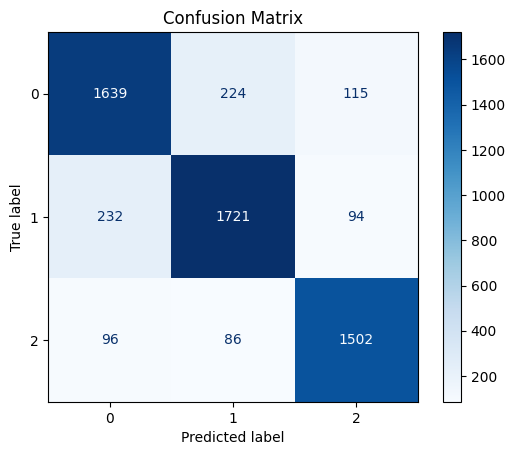

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


# Create BoW for training data
train_bow_df, vectorizer = create_bow_dataframe(filtered_train_df)
# Create BoW for testing data using the same vectorizer
test_bow_df = transform_bow_dataframe(filtered_test_df, vectorizer)

# Extract features and labels
X_train = train_bow_df.drop(columns=['label'])
y_train = train_bow_df['label']
X_test = test_bow_df.drop(columns=['label'])
y_test = test_bow_df['label']

# Initialize the model
model = MultinomialNB()

# Function to train and evaluate the model
def evaluate_model(random_state):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, y_pred

# Perform evaluation for different random states
random_states = [0, 1, 2, 3, 4]
accuracies = []
predictions = []

for state in random_states:
    accuracy, y_pred = evaluate_model(state)
    accuracies.append(accuracy)
    predictions.append(y_pred)
    print(f'Accuracy for random state {state}: {accuracy}')
    print('Classification Report:')
    print(report)
    print('Confusion Matrix:')
    print(conf_matrix)
    print('-' * 50)

average_accuracy = np.mean(accuracies)
print(f"Average Accuracy: {average_accuracy:.2f}")

# Compute and display confusion matrix
final_y_pred = np.mean(predictions, axis=0).round().astype(int)
conf_matrix = confusion_matrix(y_test, final_y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


Checking training accuracy

In [ ]:
# Calculate training accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")


Training Accuracy: 0.96


Performing 5 fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores):.2f}")


Cross-Validation Scores: [0.93759214 0.93955774 0.93464373 0.93267813 0.93166175]
Average Cross-Validation Score: 0.94


Performing Hyperparameter tuning

Best alpha: 0.13122448979591836
Accuracy: 0.8472587143107374
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1978
           1       0.85      0.82      0.84      2047
           2       0.88      0.89      0.88      1684

    accuracy                           0.85      5709
   macro avg       0.85      0.85      0.85      5709
weighted avg       0.85      0.85      0.85      5709

Confusion Matrix:
[[1662  205  111]
 [ 277 1675   95]
 [ 101   83 1500]]


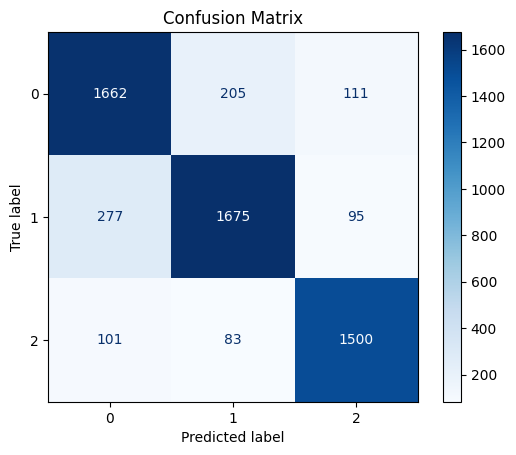

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Initialize the model
model = MultinomialNB()

# Hyperparameter tuning
param_grid = {'alpha': np.linspace(0.01, 1, 50)}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Accuracy: {accuracy}")
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.1min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.1min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.1min
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.1min
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.1min
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.1min
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  52.5s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  53.2s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  52.6s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time= 1.1min
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time= 1.1min
[CV] END ........................C=10, gamma=0.1,

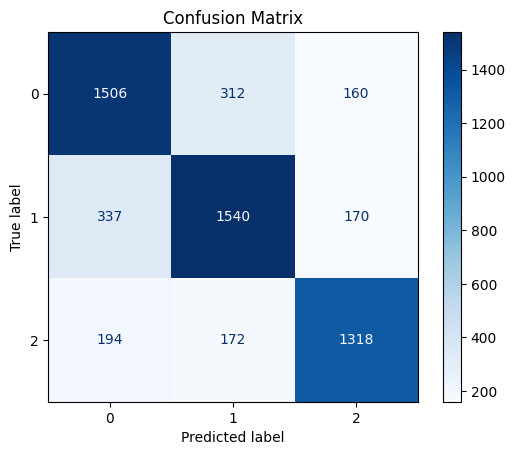

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Extract features and labels
X_train = train_bow_df.drop(columns=['label'])
y_train = train_bow_df['label']
X_test = test_bow_df.drop(columns=['label'])
y_test = test_bow_df['label']

# Use a subset of the training data
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.6, random_state=42)

# Initialize the SVM model
svm_model = SVC()

# Define the parameter grid for Gaussian SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(svm_model, param_distributions=param_grid, n_iter=4, refit=True, verbose=2, cv=3)

# Fit the model on the training data sample
random_search.fit(X_train_sample, y_train_sample)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)

# Predict using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Compute and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   1.5s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   1.7s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 1.6min
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time= 1.5min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 1}
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1978
           1       0.81      0.78      0.80      2047
           2       0.85      0.83      0.84      1684

    accuracy                           0.81      5709
   macro avg       0.81      0.81      0.81      5709
weighted avg       0.81      0.81      0.81      5709



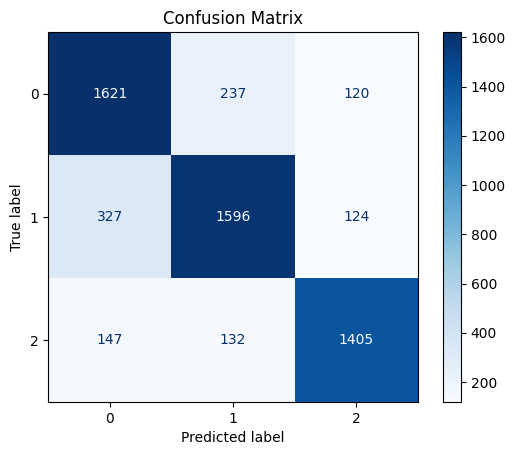

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Extract features and labels
X_train = train_bow_df.drop(columns=['label'])
y_train = train_bow_df['label']
X_test = test_bow_df.drop(columns=['label'])
y_test = test_bow_df['label']

# Use a subset of the training data
# X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.6, random_state=42)

# Initialize the SVM model
lr_model = LogisticRegression()

# Define the parameter grid for Gaussian SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear', 'saga']  # liblinear is a good choice for small datasets
}

# Initialize RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(lr_model, param_distributions=param_grid, n_iter=4, refit=True, verbose=2, cv=3)

# Fit the model on the training data sample
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)

# Predict using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Compute and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()
